In [1]:
# Bring the magic
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# city data
# get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# city data
# Get the columns and the rows are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#city data
# get the dtypes of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# city data
# get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# city data
# get the number of urban entries
sum(city_data_df["type"] == "Urban")

66

In [10]:
# city data
# get the number of suburban entries
sum(city_data_df["type"] == "Suburban")

36

In [11]:
# city data
# get the number of rural entries
sum(city_data_df["type"] == "Rural")

18

In [12]:
# ride data
# get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# ride data
# get the columns and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# ride data
# get the dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create urban city df
urban_city_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# create the suburban and rural dfs
suburban_city_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# suburban_city_df.head()
rural_city_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# rural_city_df.head()

In [18]:
# get the number of rides for urban cities
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# create the suburban and rural ride counts
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
# suburban_ride_count.head()
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]
# rural_ride_count.head()

In [20]:
# get the average fare for each city in the urban city df
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# get the average fare for each city in bothe the suburban and rural dfs
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]
# suburban_avg_fare.head()
rural_avg_fare = rural_city_df.groupby(["city"]).mean()["fare"]
# rural_avg_fare.head()

In [22]:
# get the average number of drivers for each urban city
urban_driver_count = urban_city_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# get the average number of drivers for both suburban and rural dfs
suburban_driver_count = suburban_city_df.groupby(["city"]).mean()["driver_count"]
# suburban_driver_count.head()
rural_driver_count = rural_city_df.groupby(["city"]).mean()["driver_count"]
# rural_driver_count.head()

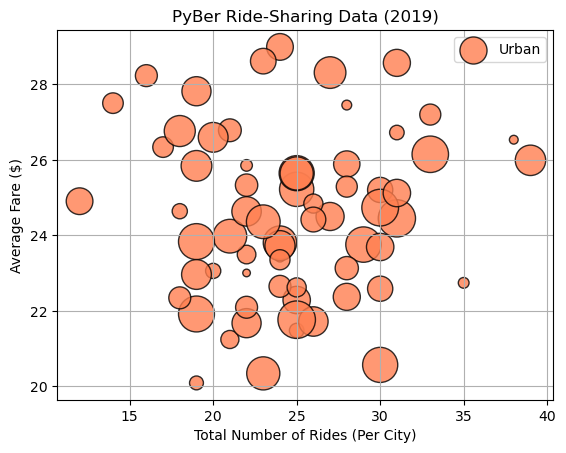

In [24]:
# build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,
           s = urban_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "coral",
           alpha = 0.8,
           label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


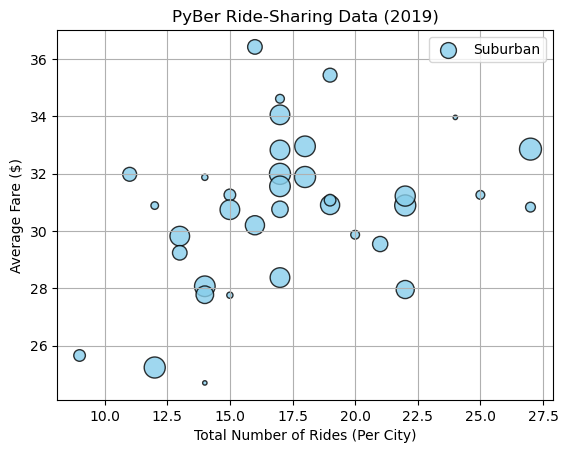

In [25]:
# build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,
           s = suburban_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "skyblue",
           alpha = 0.8,
           label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

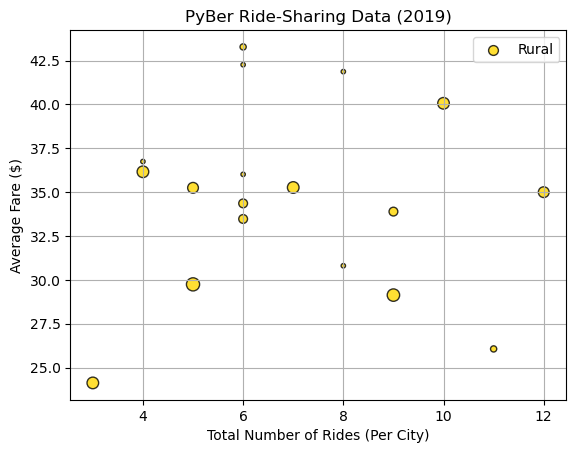

In [26]:
# build the scatter plots for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,
           s = rural_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "gold",
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

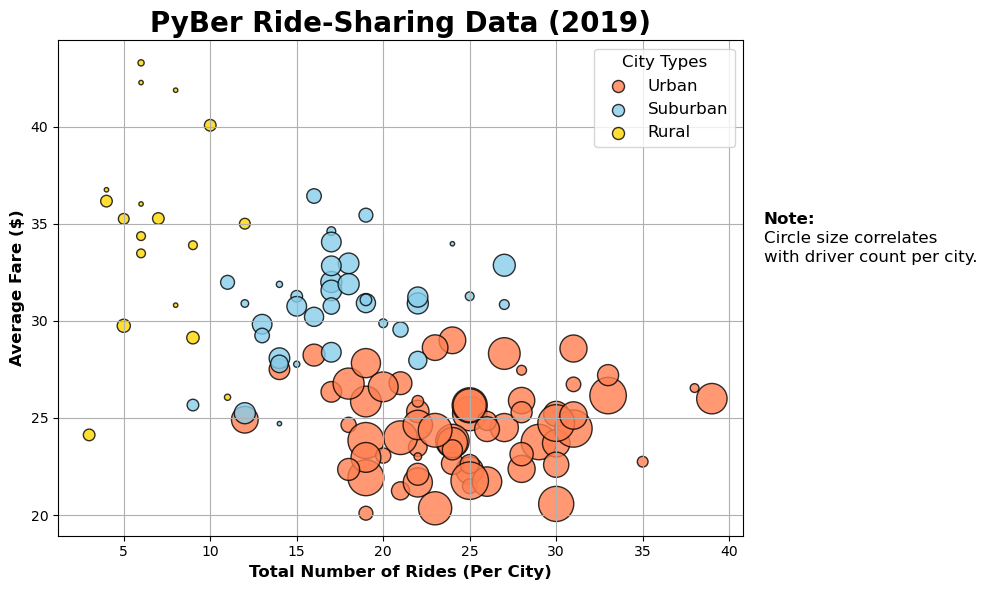

In [27]:
# add the scatter charts for each city type
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count,urban_avg_fare,
           s = urban_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "coral",
           alpha = 0.8,
           label = "Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare,
           s = suburban_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "skyblue",
           alpha = 0.8,
           label = "Suburban")

plt.scatter(rural_ride_count,rural_avg_fare,
           s = rural_driver_count*10,
           edgecolor = "black",
           linewidth = 1,
           color = "gold",
           alpha = 0.8,
           label = "Rural")

# Incorporate the other graph properties--Added weight bc it looks better
plt.title("PyBer Ride-Sharing Data (2019)", weight = "bold", fontsize = 20)
plt.ylabel("Average Fare ($)", weight = "bold", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", weight = "bold", fontsize = 12)
plt.grid(True)

# Create a Legend
lgnd = plt.legend(fontsize = "12",
                 mode = "Expanded",
                 scatterpoints = 1,
                 loc = "best",
                 title = "City Types"
                 )
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a txt label about circle size--Had to add weight to bold Note:
plt.text(42, 35, "Note:", weight = "bold", fontsize = "12")
plt.text(42, 34, "Circle size correlates", fontsize = "12")
plt.text(42, 33, "with driver count per city.", fontsize = "12")

# save the figure--Had to add plt.tight_layout to capture the Note:
plt.tight_layout()
plt.savefig("analysis/Fig1.png")

#show the plot
plt.show()

In [29]:
# get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# Calculate the mean of the ride count for each city type--round all on one line to get all three
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [45]:
# calculate the mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [53]:
#import Numpy and the stats moduule from SciPy
import numpy as np
import scipy.stats as sts

In [56]:
# calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [59]:
# get the fares for the urban cities
urban_fares = urban_city_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [66]:
# calculate the measures of central tendaency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The Median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The Median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [67]:
# get the fares for the suburban cities
suburban_fares = suburban_city_df["fare"]
suburban_fares.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [71]:
# calculate the measures of central tendaency for the average fare for the urban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The Median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The Median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [69]:
# get the fares for the rural cities
rural_fares = rural_city_df["fare"]
rural_fares.head()


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [70]:
# calculate the measures of central tendaency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The Median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The Median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [72]:
# get the driver count data from the urban cities
urban_drivers = urban_city_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [74]:
#skills drill
suburban_avg = suburban_city_df["driver_count"].mean()
suburban_avg

13.712

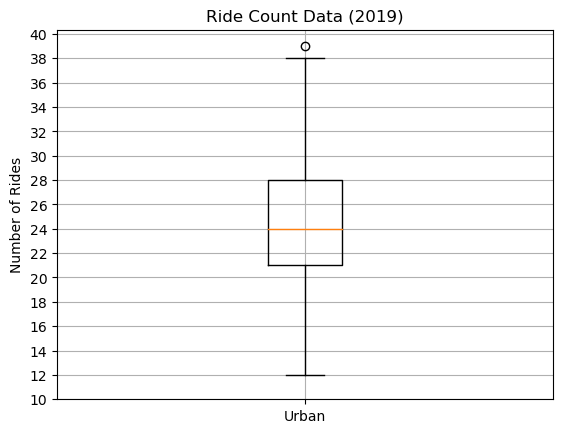

In [76]:
# create a box-and-whisker plot for urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step = 2.0))
ax.grid()
plt.show()

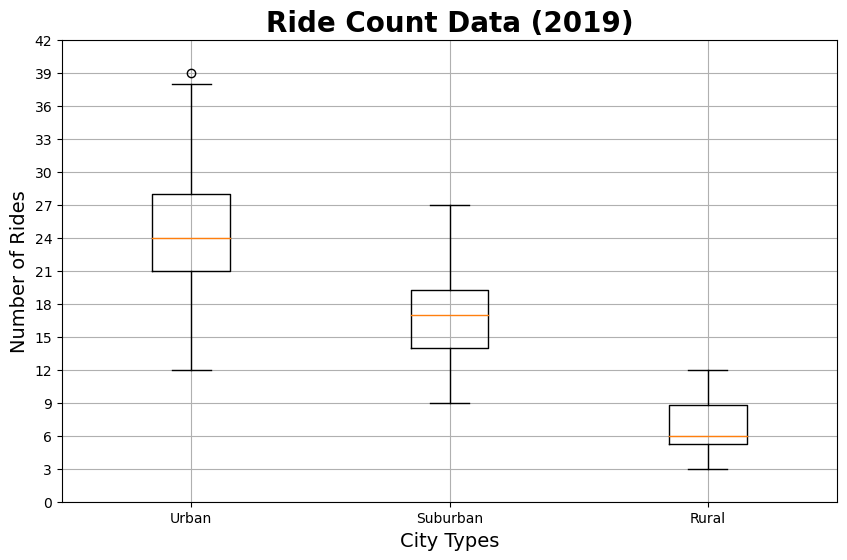

In [77]:
# add all ride count box-and-whisler plots to the same graph

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20, weight="bold")
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,45, step = 3.0))
ax.grid()

#save figure
plt.savefig("analysis/Fig2.png")
plt.show()


In [78]:
# get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


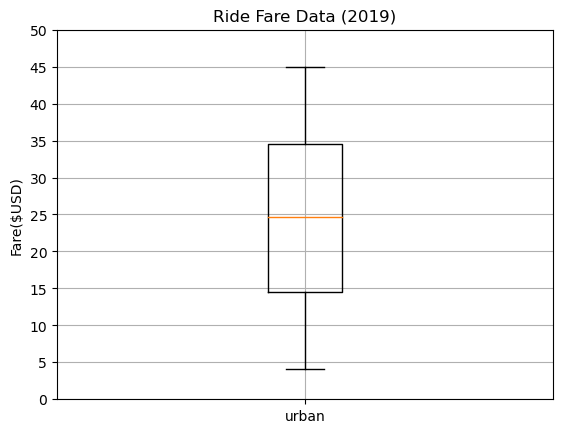

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [80]:
# create a box-and-whisker plot for the urban fare data
x_labels = ["urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [81]:
# get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [82]:
# get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares


63538.64

In [83]:
type_percents = 100* sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

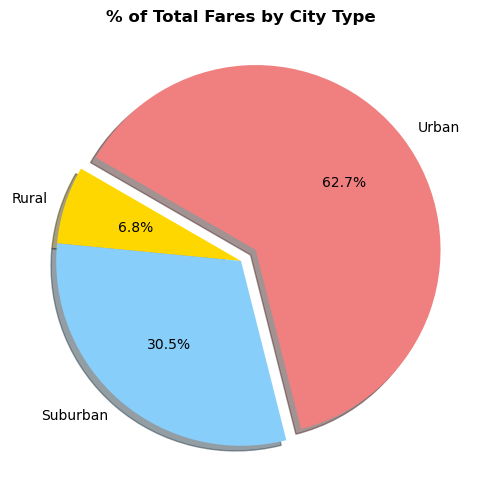

In [88]:
# import mpl to change the plot configuration using rcParams
import matplotlib as mpl
# build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct = "%1.1f%%",
        shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City Type", weight = "bold")

# change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# save figure
plt.savefig("analysis/fig5.png")

plt.show()

In [93]:
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [94]:
pyber_data_df["ride_id"].count()

2375

In [95]:
# calculate the percentage of rides for each city type
ride_percents = 100* pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

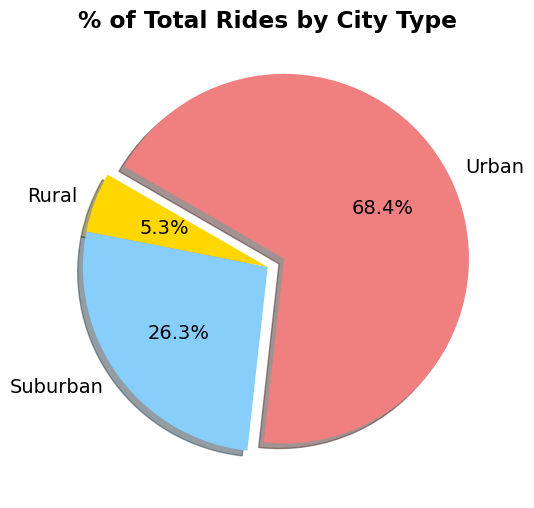

In [97]:
# import mpl to change the plot configuration using rcParams
import matplotlib as mpl
# build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0,0,0.1],
        autopct = "%1.1f%%",
        shadow = True,
       startangle = 150)
plt.title("% of Total Rides by City Type", weight = "bold")

# change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [100]:
# calculate the per centage of drivers for each city type
driver_percents = 100* city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural         65.000000
Suburban     408.333333
Urban       2004.166667
Name: driver_count, dtype: float64